### RED WINE QUALITY DATA PREPROCESSING 🍷

Bu notebookta veri ön işleme (data preprocessing) yaparak aykırı gözlem ve eksik veri gibi makine öğrenmesi modelimizin performansını kötü yönde etkileyebilecek olan sorunları çözmeye çalışacağız. Amacımız veri setini dengeli bir hale getirip makine öğrenmesi modellerinin rahat işlem yapabilir olmasını sağlamak.

In [1]:
# gerekli kütüphaneler
import numpy as np  # sayısal işlemler 
import pandas as pd  # veri manipülasyonu 
import seaborn as sns  # görselleştirme
import matplotlib.pyplot as plt  # görselleştirme

# görsel çıktılardaki uyarı mesajları için
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# verinin wine değişkenine yüklenmesi
wine = pd.read_csv('winequality-red.csv')

In [3]:
df = wine.copy()

## Veri Temizleme (Data Cleaning)
+ Gürültülü Veri (Noisy Data) $\to$ yanlış/bozuk veriler
+ Eksik Veri Analizi (Missing Data Analysis) 
+ Aykırı Değer Analizi (Outlier Analysis)

### Aykırı Değer Analizi
Aykırı gözlem, veride normalin önemli ölçüde dışında olan nadir noktalara denir. 

Aykırı gözlemler, 
+ Verilerin dağılımını ve betimsel istatistiklerini etkilerler.
+ Makine öğrenmesi modellerinin sonuçlarına olumsuz yönde etki edebilirler.
+ İstatistiksel testlerin gücünü azaltabilirler.

#### Aykırı Gözlemlerin Tanımlanması
> #### IQR Metodu

<img src="https://miro.medium.com/v2/resize:fit:1400/0*Rpd3tQj-kUpwObeA" width="700" height="300">


In [4]:
df_fixed_acidity = df['fixed acidity']

In [5]:
df_fixed_acidity.head()

0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
Name: fixed acidity, dtype: float64

<Axes: xlabel='fixed acidity'>

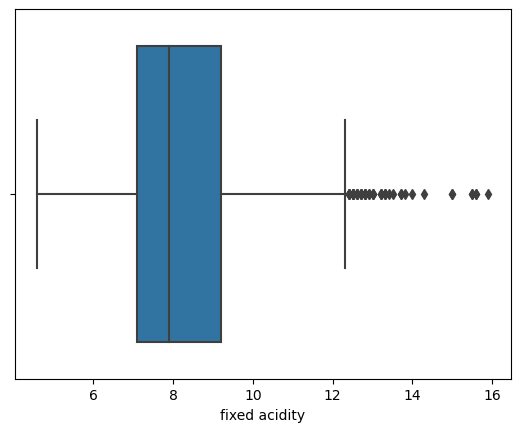

In [6]:
sns.boxplot(x = df_fixed_acidity)

In [7]:
# sınır değer belirleme, eşik değer belirleme
Q1 = df_fixed_acidity.quantile(0.25)
Q3 = df_fixed_acidity.quantile(0.75)
IQR = Q3 - Q1

In [8]:
print(Q1, Q3, IQR)

7.1 9.2 2.0999999999999996


In [9]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [10]:
print(alt_sinir, ust_sinir)

3.95 12.349999999999998


In [13]:
(df_fixed_acidity < alt_sinir)  | (df_fixed_acidity > ust_sinir)

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: fixed acidity, Length: 1599, dtype: bool

In [16]:
aykiri_tf = (df_fixed_acidity < alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: fixed acidity, dtype: bool

In [23]:
df_fixed_acidity[aykiri_tf].values

array([], dtype=float64)